### Part I Review the online programming. 

In [8]:
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
prices = defaultdict(int)

for i,k in enumerate(original_price):
    prices[i+1] = k

如果想统计 r(n) 的调用次数，同时不需要修改 r(n) 的内部代码，可以使用装饰器(Decorator)

In [10]:
from functools import wraps

In [11]:
called_time_with_arg = defaultdict(int)
solution = {}

In [12]:
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

In [13]:
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue
    """
    max_price, max_split = max(
        [(prices[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], 
        key = lambda x:x[0] 
    )
    
    solution[n] = (n-max_split, max_split)
    
    return max_price

In [14]:
r(9)

25

In [15]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3)}

In [16]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [17]:
parse_solution(9)

[6, 3]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

$$loss_2=\frac{1}{n}\sum{|y_i-\hat{y_i}|}$$

In [18]:
def abs_loss(y, y_hat):
    return sum(abs(y_i-y_i_hat) for y_i, y_i_hat in zip(list(y), list(y_hat))) / len(y)

$$if\quad y_i>\hat{y_i} \quad or \quad y_i<\hat{y_i}$$
$$d_k=-\frac{1}{n}\sum{(y_i-\hat{y_i})x_i}$$<br>
$$d_b=-\frac{1}{n}\sum{(y_i-\hat{y_i})}$$

$$if\quad y_i==\hat{y_i}$$
$$d_k=0$$<br>
$$d_b=0$$

In [19]:
def partial_k_(x, y, y_hat):
    k_gradient = 0
    for x_i, y_i, y_i_hat in zip(list(x), list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: k_gradient += 0
        else:
            k_gradient += (y_i - y_i_hat) * x_i
    return (-1 / len(y)) * k_gradient

def partial_b_(y, y_hat):
    b_gradient = 0
    for y_i, y_i_hat in zip(list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: b_gradient += 0
        else:
            b_gradient += (y_i - y_i_hat)
    return (-1 / len(y)) * b_gradient

In [20]:
def draw_x_and_y():
    plt.scatter(X[:,5], Y)

In [21]:
def price(k, rm, b):
    return rm * k + b

In [22]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
data = load_boston()
X, Y = data['data'], data['target']

In [26]:
x = X[:,5]
y = Y[:] # data set

training_times = 2000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
learning_rate = 1e-3

for i in range(training_times):
    price_by_gradient_descent = [price(best_k, rm, best_b) for rm in x]
    k_direction = partial_k_(x, y, price_by_gradient_descent)
    b_direction = partial_b_(y, price_by_gradient_descent)
    
    # upadate
    best_k -= k_direction * learning_rate
    best_b -= b_direction * learning_rate
    cur_loss = abs_loss(x, price_by_gradient_descent)
    # print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, best_k, best_b, cur_loss))

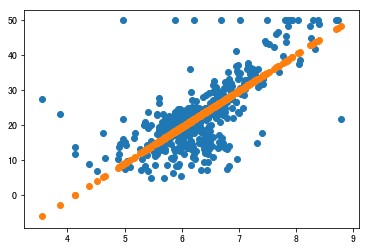

In [27]:
price_by_random_k_and_b = [price(best_k, rm, best_b) for rm in x]
draw_x_and_y()
plt.scatter(x, price_by_random_k_and_b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

operation: DEL、ADD、SUB

In [80]:
solution = {}

In [81]:
def lru_cache(maxsize):
    cache = {}
    def middle(func):
        def _wrap(str1, str2):
            if (str1, str2) in cache: 
                result = cache[(str1, str2)]
            else:
                result = func(str1, str2)
                cache[(str1, str2)] = result
            return result
        return _wrap
    return middle

In [82]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation
    
    return min_distance

In [83]:
edit_distance('ABCDE', 'ABCCEF')

2

In [84]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}

In [91]:
def parse_solution_edit_distance(str1, str2):
    operator = solution[(str1, str2)]
    if 'ADD' in operator: 
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1, str2[:-1]))
    elif 'DEL' in operator:
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1[:-1], str2))
    elif 'SUB' in operator:
        return '{}->{}'.format(operator, parse_solution_edit_distance(str1[:-1], str2[:-1]))
    else:
        return 'finished'

In [93]:
parse_solution_edit_distance('AB', 'ABCCE')

'ADD E->ADD C->ADD C->finished'

### Part 5-1: review machine learning

#### 1.Why do we use Derivative / Gredient to fit a target function?

ANS: 导数/梯度 的反方向是 目标函数 的下降方向.

#### 2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

ANS:Gredient指的是目标函数的变化，Descent是利用Gradient进行参数更新的方法.

#### 3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

ANS:每一步都可以获得目标函数下降的方向.

#### 4. Using the simple words to describe: What's the machine leanring.

ANS: 如何根据数据自动生成函数.

### Part 5: Answer following questions:

#### 1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

ANS: 动态规划可以用于解决搜索问题中的冗余计算，提升效率。与其他搜索问题相比，动态规划可以得到全局最优解。

#### 2.Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

ANS:机器学习只是解决问题的一种方法。一些问题使用搜索解决更加简单，而相反使用机器学习更加复杂，同时机器学习需要大量的数据。

##### 3.Can you catch up at least 3 problems which could solved by Dynamic Programming?

ANS:<br>
1.编辑距离<br>
2.币种兑换<br>
3.最大子数组和<br>

##### 4.Can you catch up at least 3 problems wich could sloved by Edit Distance?

ANS:<br> 
1.Spell Correction<br>
2.Evaluating Machine Translation<br>
3.Evaluating Speech Recognition<br>

#### 5.Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

ANS:<br> 
1.Subproblems: 动态规划问题通常可以将问题分解为若干个子问题，通过解决子问题来获得当前问题的解<br>
2.Overlappings: 子问题间存在重合，通过将已解决的子问题存储在表中已避免重复计算<br>
3.Parse solution: 进行解析得到问题的最优解.<br>

#### 6.What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

ANS:<br>
1.动态规划只是一种思想，具体到问题要具体分析<br>
2.需要存所有的中间结果<br>

### (Optinal) Finish the k-person-salesman problem: